# It's a Fraud

Given details about a transaction determine whether the transaction is a Fraud or Not

## Dataset Description

In this competition you are predicting whether an online transaction is fraudulent or not

### Files

train.csv - the training set

test.csv - the test set

sample_submission.csv - a sample submission file in the correct format
Columns

`TransactionDT: timedelta from a given reference datetime (not an actual timestamp) “TransactionDT "corresponds to the number of seconds in a day.
TransactionAMT: transaction payment amount in USD

`ProductCD: product code, the product for each transaction

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address

“both addresses are for purchaser

addr1 as billing region

addr2 as billing country”

dist: distances between (not limited) billing address, mailing address, zip
code, IP address, phone area, etc.”

P_ and (R__) emaildomain: purchaser and recipient email domain

“ certain transactions don't need recipient, so R_emaildomain is null.”

C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc.

D1-D15: timedelta, such as days between previous transaction, etc.

M1-M9: match, such as names on card and address, etc.

Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

“id01 to id11 are numerical features for identity.

Other columns such as network connection information (IP, ISP, Proxy, etc),digital signature (UA/browser/os/version, etc) associated with transactions are also present

Importing dependencies



In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [289]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [290]:
#from google.colab import drive
#drive.mount('/content/drive')

Reading given training data into dataframe: train_df

In [291]:
train_df = pd.read_csv("../input/trainingdata/train.csv")
test_df = pd.read_csv("../input/testingdata/test.csv")

In [292]:
train_df.shape

(442905, 434)

This is moderately sized data. heavy preprocessing is required to extract meaningful features(columns) and remove faulty/ redundant data entries(rows).

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [293]:
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3424175,0,11053717,49.00,W,5033,269.0,150.0,mastercard,224.0,debit,330.0,87.0,6.0,NaN,gmail.com,NaN,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,21.0,2.0,14.0,14.0,9.0,370.0,9.0,NaN,NaN,NaN,NaN,14.0,351.0,NaN,NaN,NaN,375.0,T,T,T,M0,T,F,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,98.000000,0.000000,0.0,98.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,98.000000,0.000000,0.0,98.000000,0.0,0.000000,49.000000,98.000000,98.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3206179,0,51508

In [294]:
train_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,4.429050e+05,442905.000000,4.429050e+05,442905.000000,442905.000000,436201.000000,441724.000000,439730.000000,393811.000000,393811.000000,178614.000000,28168.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,441970.000000,232380.000000,245814.000000,316249.000000,210587.000000,54709.000000,29088.000000,56163.000000,56163.000000,385976.000000,233410.000000,48374.000000,46305.000000,46570.000000,376154.000000,233410.000000,233410.000000,233410.000000,233410.000000,233410.000000,233410.000000,233410.000000,233410.000000,233410.000000,233410.000000,233410.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,385941.000000,316212.000000,316212.000000,316212.000000,316212.000000,316212.000000,316212.000000,316212.000000,316212.000000,316212.000000,316212.000000,316212.000000,316212.000000,316212.000000,316212.000000,316212.000000,316212.000000,316212.000000,316212.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,385204.000000,376111.000000,376111.000000,376111.000000,376111.000000,376111.000000,376111.000000,376111.000000,376111.000000,376111.000000,376111.000000,376111.000000,376111.000000,376111.000000,376111.000000,376111.000000,376111.000000,376111.000000,376111.000000,376111.000000,376111.000000,442659.000000,442659.000000,442659.000000,442659.000000,442659.000000,442659.000000,442659.000000,442659.000000,442659.000000,442659.000000,442659.000000,442659.000000,442659.000000,442659.00

In [295]:
missing_values_count = train_df.isnull().sum()
print (missing_values_count[0:10])
total_cells = np.product(train_df.shape)
total_missing = missing_values_count.sum()
print ("% of missing data = ",(total_missing/total_cells) * 100)

TransactionID        0
isFraud              0
TransactionDT        0
TransactionAmt       0
ProductCD            0
card1                0
card2             6704
card3             1181
card4             1191
card5             3175
dtype: int64
% of missing data =  45.08747467820465


In [296]:
catagorical_features=train_df.select_dtypes(include=['category','object']).columns
continuous_features = list(filter(lambda x: x not in catagorical_features, train_df))
catagorical_features

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

#EDA: Explanatory Data Analysis:

# isFraud - Target Distribution

Extreme imbalanced, only 3.53% of Transactions that are fraudulent in the train dataset.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


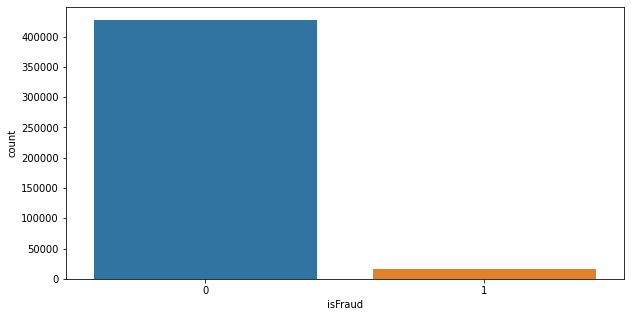

From total data  3.5 % contains fraud train
From total data  96.5 % contains legit train


In [297]:
plt.subplots(figsize=(10,5))
sns.countplot(train_df['isFraud'])
plt.show()
print('From total data ',np.round(train_df[train_df['isFraud']==1].shape[0]/train_df.shape[0]*100,2),'% contains fraud train')
print('From total data ',np.round(train_df[train_df['isFraud']==0].shape[0]/train_df.shape[0]*100,2),'% contains legit train')

# ProductCD

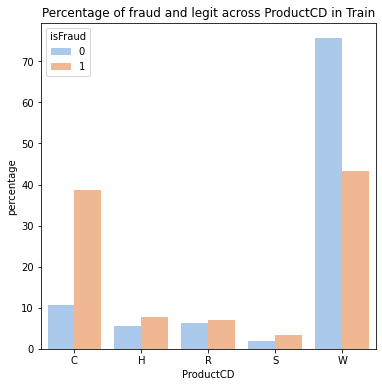

In [298]:
plt.figure(figsize=(6,6))
train_ProductCD = (train_df.groupby(['isFraud'])['ProductCD'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('ProductCD'))
sns.barplot(x="ProductCD", y="percentage", hue="isFraud", data=train_ProductCD,palette = 'pastel')
plt.title('Percentage of fraud and legit across ProductCD in Train')
plt.show()

From the graph above we can see that if the transaction is fraudulent, there is 40% chance it's Product C (We can't say vice versa). Considering that only 10% of Legit transaction is C, I think there is higher chance that it's a fraud if it's product is C.

# Transaction amount

Text(0.5, 0.98, 'TransactionAmt Distribution')

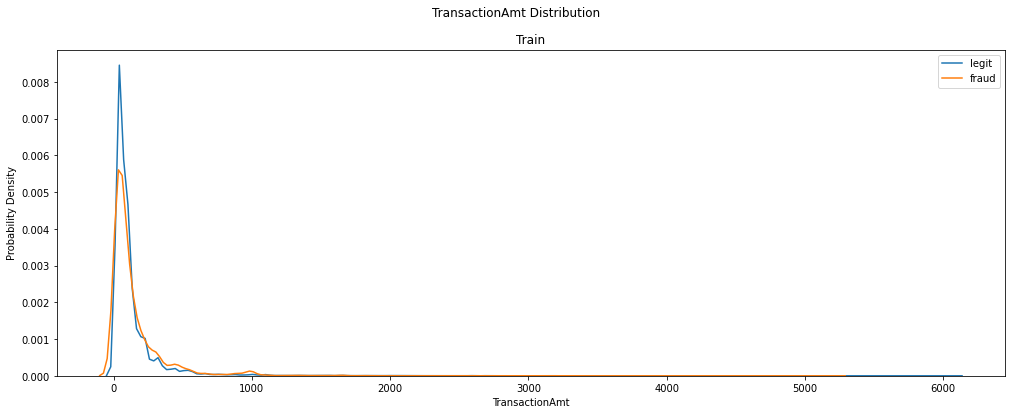

In [299]:
plt.figure(figsize=(17,6))
sns.kdeplot(train_df[train_df['isFraud']==0]['TransactionAmt'])
sns.kdeplot(train_df[train_df['isFraud']==1]['TransactionAmt'])
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')
plt.suptitle('TransactionAmt Distribution' , fontsize=12)

In [300]:
train_df['TransactionAmt'] = np.log(train_df['TransactionAmt'])
test_df['TransactionAmt'] = np.log(test_df['TransactionAmt'])

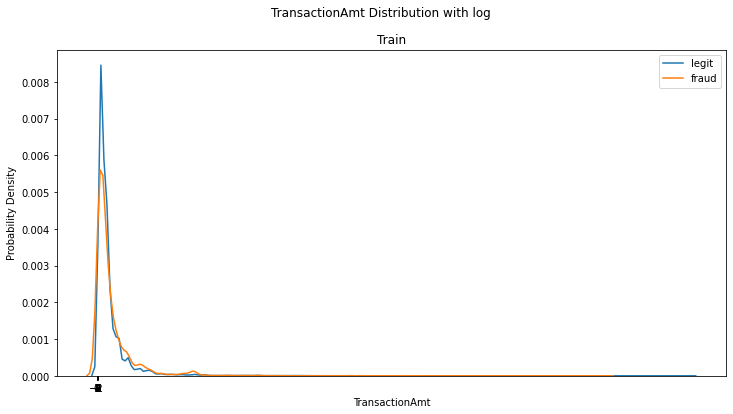

In [301]:
plt.figure(figsize=(12,6))
sns.kdeplot(train_df[train_df['isFraud']==0]['TransactionAmt'])
sns.kdeplot(train_df[train_df['isFraud']==1]['TransactionAmt'])
plt.xticks(np.arange(-2, 10, 1))
plt.ylabel('Probability Density')
plt.legend(['legit','fraud'])
plt.title('Train')
plt.suptitle('TransactionAmt Distribution with log' , fontsize=12)
plt.show()

The transactions with LogTransactionAmt larger than 5.5 (244 dollars) and smaller than 3.3 (27 dollars) have higher frequency and probability density being fraudulent. On the other hand, LogTransactionAmt from 3.3 to 5.5 have higher chance being legit.

# Analyzing DeviceType

In [302]:
print(len(train_df['DeviceType'].value_counts()))

2


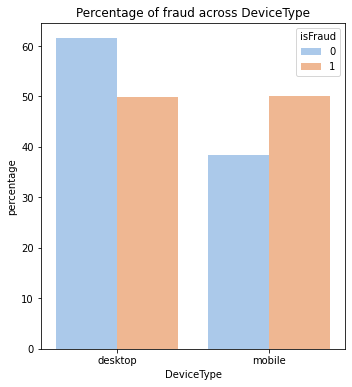

In [303]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
train_df_DeviceType = (train_df[~train_df['DeviceType'].isnull()].groupby(['isFraud'])['DeviceType'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('DeviceType'))
sns.barplot(x="DeviceType", y="percentage", hue="isFraud", data=train_df_DeviceType, palette = 'pastel')
plt.title('Percentage of fraud across DeviceType')
plt.show()

Both Desktop and mobile have the same percentage of fraud

# addr1 and addr2

<AxesSubplot:>

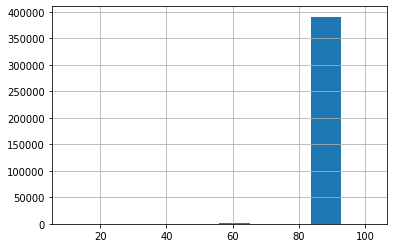

In [304]:
train_df['addr2'].hist()

<AxesSubplot:>

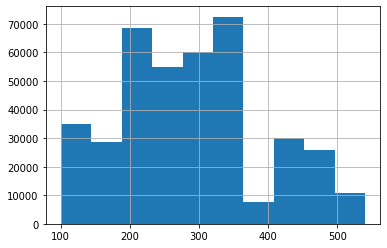

In [305]:
train_df['addr1'].hist()

In [306]:
train_df = train_df.drop(['addr2'],axis=1)
test_df = test_df.drop(['addr2'],axis=1)

as 4 lakh rows have same value for addr2 col, we will drop it 
as variance is very low

# Analyzing C1 to C14

As we can see in the above plot they all are highly right skewed so there must be outliers lets remove some of them.

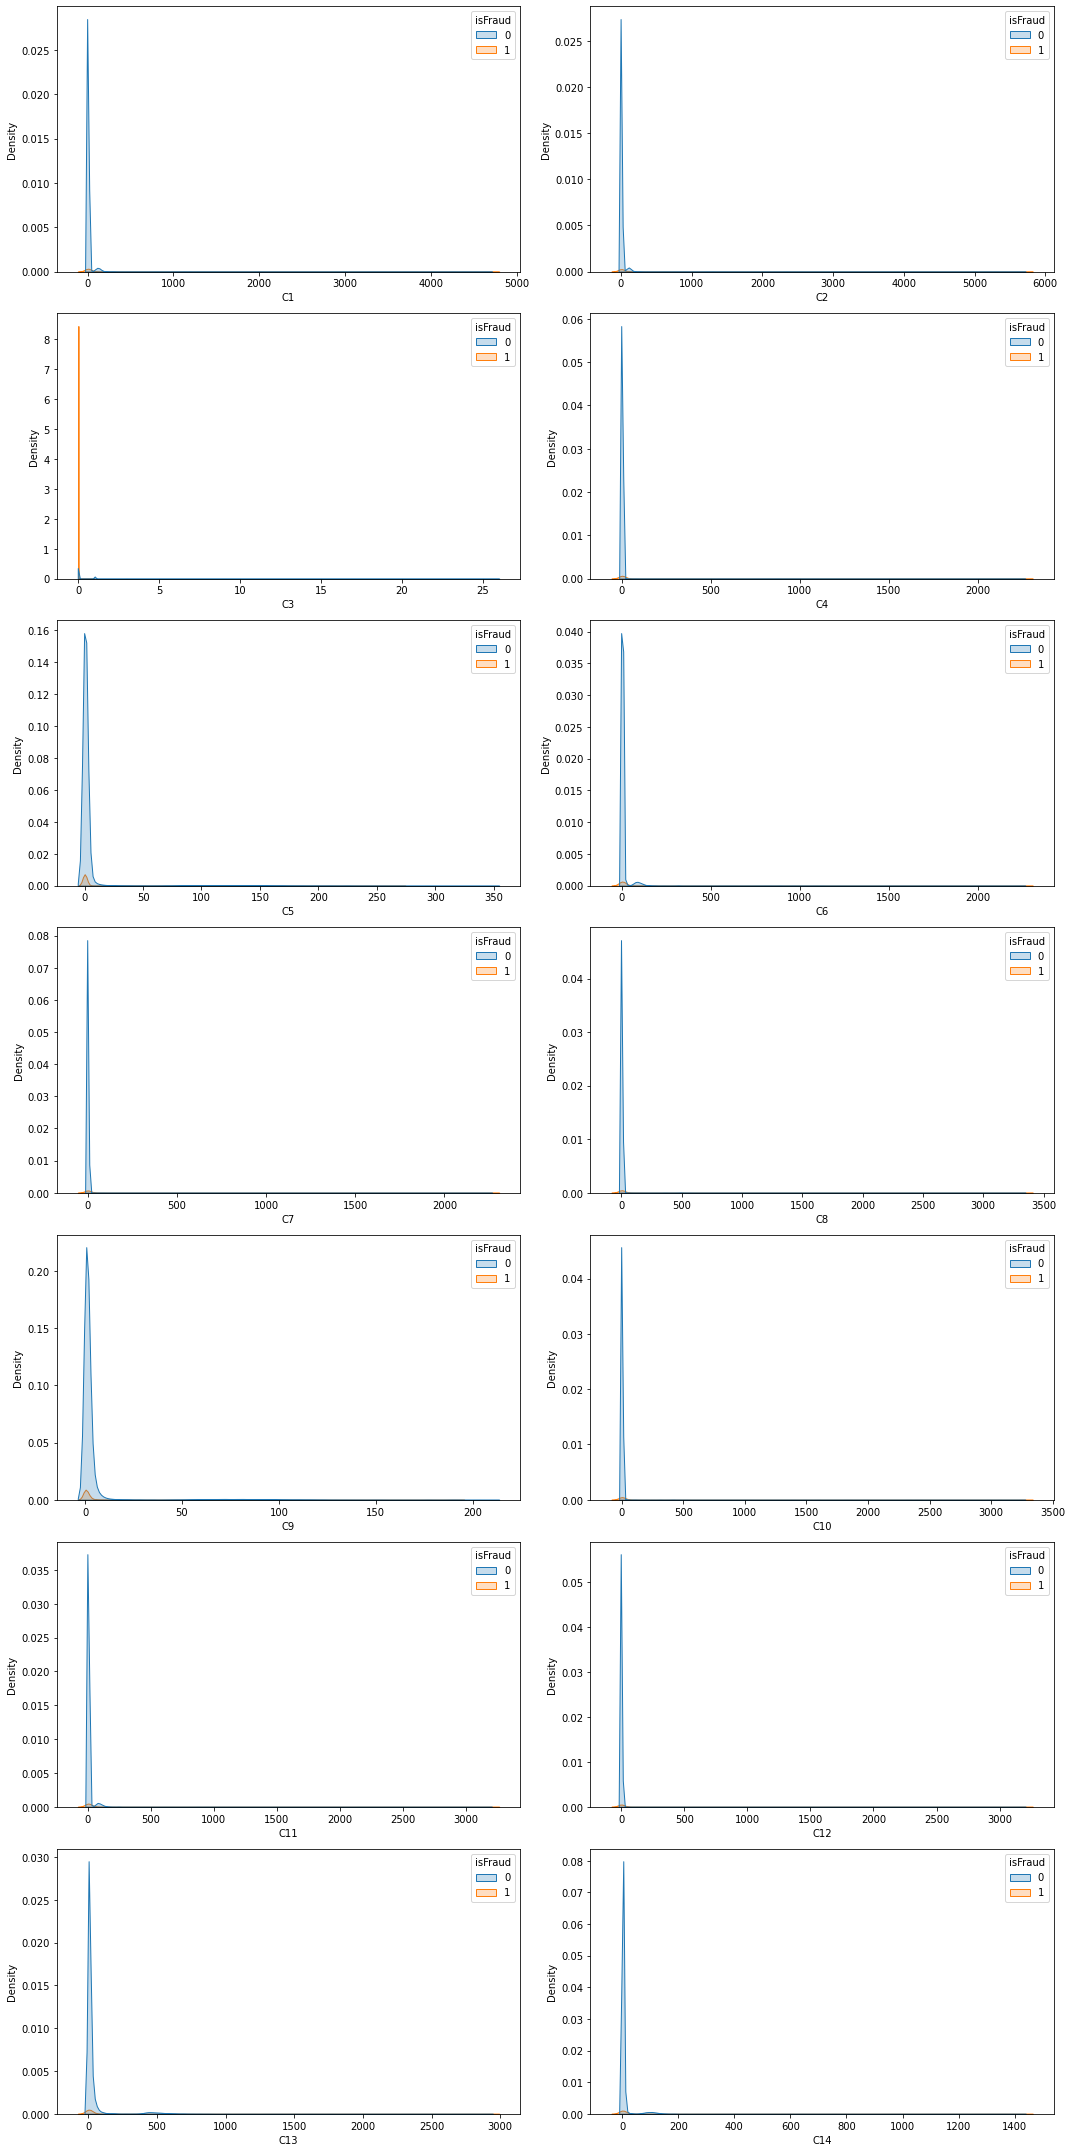

In [307]:
f, axes = plt.subplots(7, 2, figsize=(15,30))

cols = [f"C{i}" for i in range(1, 15)]

for col, ax in zip(cols, axes.flat):
    sns.kdeplot(data=train_df, x=col, hue="isFraud", fill=True, ax=ax)

plt.tight_layout()

# Preprocessing

In [308]:
test_df.isna().sum() / len(test_df) * 100

TransactionID      0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
card1              0.000000
card2              1.509805
card3              0.260101
card4              0.261456
card5              0.734243
card6              0.261456
addr1             11.252074
dist1             59.592915
dist2             93.592983
P_emaildomain     15.934568
R_emaildomain     76.588885
C1                 0.000000
C2                 0.000000
C3                 0.000000
C4                 0.000000
C5                 0.000000
C6                 0.000000
C7                 0.000000
C8                 0.000000
C9                 0.000000
C10                0.000000
C11                0.000000
C12                0.000000
C13                0.000000
C14                0.000000
D1                 0.226234
D2                47.598469
D3                44.560572
D4                28.628713
D5                52.509906
D6                87.483998
D7                93

In [309]:
train_df.isna().sum() / len(train_df) * 100

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
card1              0.000000
card2              1.513643
card3              0.266649
card4              0.268906
card5              0.716858
card6              0.267552
addr1             11.084544
dist1             59.672164
dist2             93.640171
P_emaildomain     16.014947
R_emaildomain     76.805861
C1                 0.000000
C2                 0.000000
C3                 0.000000
C4                 0.000000
C5                 0.000000
C6                 0.000000
C7                 0.000000
C8                 0.000000
C9                 0.000000
C10                0.000000
C11                0.000000
C12                0.000000
C13                0.000000
C14                0.000000
D1                 0.211106
D2                47.532767
D3                44.499611
D4                28.596652
D5                52.453235
D6                87

Removing rows with columns having less than 1 percent NULL values.

In [310]:
train_df.drop(axis="rows", labels=train_df.index[train_df['card2'].isna()], inplace=True)
train_df.drop(axis="rows", labels=train_df.index[train_df['card3'].isna()], inplace=True)
train_df.drop(axis="rows", labels=train_df.index[train_df['card4'].isna()], inplace=True)
train_df.drop(axis="rows", labels=train_df.index[train_df['card5'].isna()], inplace=True)
train_df.drop(axis="rows", labels=train_df.index[train_df['card6'].isna()], inplace=True)
train_df.drop(axis="rows", labels=train_df.index[train_df['D1'].isna()], inplace=True)
train_df.drop(axis="rows", labels=train_df.index[train_df['V95'].isna()], inplace=True)
train_df.drop(axis="rows", labels=train_df.index[train_df['V279'].isna()], inplace=True)
train_df.drop(axis="rows", labels=train_df.index[train_df['V281'].isna()], inplace=True)

Removing Columns with more than 70 percent NULL values.

In [311]:
train_df = train_df.drop(columns =train_df[ list(train_df.loc[:,'V138':'V278']) + ['dist2','R_emaildomain','D12','D13','D14','DeviceType','DeviceInfo'] + list(train_df.loc[:,'D6':'D9']) + list(train_df.loc[:,'V322':'V339']) + list(train_df.loc[:,'id_01':'id_38'])])

test_df = test_df.drop(columns =test_df[ list(test_df.loc[:,'V138':'V278']) + ['dist2','R_emaildomain','D12','D13','D14','DeviceType','DeviceInfo'] + list(test_df.loc[:,'D6':'D9']) + list(test_df.loc[:,'V322':'V339']) + list(test_df.loc[:,'id_01':'id_38'])])

Now filling the remaining column NULL values accordingly.

In [312]:
train_df.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2                  0
card3                  0
card4                  0
card5                  0
card6                  0
addr1              48310
dist1             258616
P_emaildomain      69545
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                     0
D2                205077
D3                192183
D4                124319
D5                227294
D10                56191
D11               205480
D15                65658
M1                199685
M2                199685
M3                199685
M4                206790


In [313]:
train_df['dist1'].describe()

count    174968.000000
mean        118.576963
std         371.983875
min           0.000000
25%           3.000000
50%           8.000000
75%          24.000000
max       10286.000000
Name: dist1, dtype: float64

<AxesSubplot:>

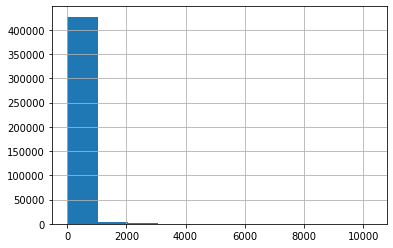

In [314]:
train_df['dist1'] = train_df['dist1'].fillna(train_df['dist1'].median())
test_df['dist1'] = test_df['dist1'].fillna(test_df['dist1'].median())
train_df['dist1'].hist()

In [315]:
train_df['addr1'].fillna(train_df['addr1'].mode().iloc[0], inplace=True)
test_df['addr1'].fillna(test_df['addr1'].mode().iloc[0], inplace=True)

In [316]:
train_df['P_emaildomain'] = train_df['P_emaildomain'].fillna('NA')
test_df['P_emaildomain'] = test_df['P_emaildomain'].fillna('NA')

In [317]:
train_df.loc[:,'D1':'D15'] = train_df.loc[:,'D1':'D15'].fillna(train_df.loc[:,'D1':'D15'].mean())
test_df.loc[:,'D1':'D15'] = test_df.loc[:,'D1':'D15'].fillna(test_df.loc[:,'D1':'D15'].mean())

In [318]:
train_df.loc[:,'V1':'V94'] = train_df.loc[:,'V1':'V94'].fillna(train_df.loc[:,'V1':'V94'].mean())
test_df.loc[:,'V1':'V321'] = test_df.loc[:,'V1':'V321'].fillna(test_df.loc[:,'V1':'V321'].mean())

In [319]:
train_df.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2                  0
card3                  0
card4                  0
card5                  0
card6                  0
addr1                  0
dist1                  0
P_emaildomain          0
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                     0
D2                     0
D3                     0
D4                     0
D5                     0
D10                    0
D11                    0
D15                    0
M1                199685
M2                199685
M3                199685
M4                206790


In [320]:
train_df.loc[:,'M1':'M9'] = train_df.loc[:,'M1':'M9'].replace({'T': 0 ,'F': 1})
train_df['M4'] = train_df['M4'].replace({'M0': 0 ,'M1': 1 , 'M2': 2})

test_df.loc[:,'M1':'M9'] = test_df.loc[:,'M1':'M9'].replace({'T': 0 ,'F': 1})
test_df['M4'] = test_df['M4'].replace({'M0': 0 ,'M1': 1 , 'M2': 2})

In [321]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_df['ProductCD']=label_encoder.fit_transform(train_df['ProductCD'])
train_df['card4']=label_encoder.fit_transform(train_df['card4'])
train_df['card6']=label_encoder.fit_transform(train_df['card6'])
train_df['P_emaildomain']=label_encoder.fit_transform(train_df['P_emaildomain'])

test_df['ProductCD']=label_encoder.fit_transform(test_df['ProductCD'])
test_df['card4']=label_encoder.fit_transform(test_df['card4'])
test_df['card6']=label_encoder.fit_transform(test_df['card6'])
test_df['P_emaildomain']=label_encoder.fit_transform(test_df['P_emaildomain'])

In [322]:
train_df = train_df.drop(columns = ['TransactionID'])

test_df = test_df.drop(columns = ['TransactionID'])

train_df.duplicated().sum()

2

In [323]:
train_df.drop(axis="rows", labels=train_df.index[train_df.duplicated()], inplace=True)
train_df.duplicated().sum()

0

In [324]:
train_df.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,dist1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0,11053717,49.00,4,5033,269.0,150.0,2,224.0,2,330.0,6.0,17,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,21.0,2.0,14.0,14.000000,9.000000,370.0,9.000000,14.0,351.000000,375.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,98.000000,0.000000,0.0,98.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,98.000000,0.000000,0.0,98.000000,0.0,0.000000,49.000000,98.000000,98.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0,5150800,57.95,4,4527,376.0,150.0,3,226.0,2,441.0,8.0,17,2.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,14.0,2.0,136.0,136.000000,8.000000,136.0,8.000000,136.0,147.263932,136.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.999939,1.04501,1.077605,0.846868,0.876946,1.045729,1.072375,1.02779,1.041512,0.463455,0.478387,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,229.800003,0.000000,0.0,229.800003,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,229.800003,0.000000,0.0,229.800003,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0,10713596,115.95,4,2772,512.0,150.0,3,226.0,2,143.0,14.0,7,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,14.0,2.0,193.0,193.000000,0.000000,495.0,0.000000,495.0,495.000000,495.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000

In [325]:
train_df['M1'].value_counts(normalize=True)

0.0    0.999923
1.0    0.000077
Name: M1, dtype: float64

In [326]:
train_df['M1'] = train_df['M1'].fillna(pd.Series(np.random.choice([0,1], p=[0.99, 0.01], size=len(train_df))))
test_df['M1'] = test_df['M1'].fillna(pd.Series(np.random.choice([0,1], p=[0.99, 0.01], size=len(test_df))))

In [327]:
train_df['M2'].value_counts(normalize=True)

0.0    0.893744
1.0    0.106256
Name: M2, dtype: float64

In [328]:
train_df['M2'] = train_df['M2'].fillna(pd.Series(np.random.choice([0,1], p=[0.89, 0.11], size=len(train_df))))
test_df['M2'] = test_df['M2'].fillna(pd.Series(np.random.choice([0,1], p=[0.89, 0.11], size=len(test_df))))

In [329]:
train_df['M3'].value_counts(normalize=True)

0.0    0.788609
1.0    0.211391
Name: M3, dtype: float64

In [330]:
train_df['M3'] = train_df['M3'].fillna(pd.Series(np.random.choice([0,1], p=[0.78, 0.22], size=len(train_df))))
test_df['M3'] = test_df['M3'].fillna(pd.Series(np.random.choice([0,1], p=[0.78, 0.22], size=len(test_df))))

In [331]:
train_df['M4'].value_counts(normalize=True)

0.0    0.635831
2.0    0.193097
1.0    0.171072
Name: M4, dtype: float64

In [332]:
train_df['M4'] = train_df['M4'].fillna(pd.Series(np.random.choice([0,2,1], p=[0.63, 0.20, 0.17], size=len(train_df))))
test_df['M4'] = test_df['M4'].fillna(pd.Series(np.random.choice([0,2,1], p=[0.63, 0.20, 0.17], size=len(test_df))))

In [333]:
train_df['M5'].value_counts(normalize=True)

1.0    0.553054
0.0    0.446946
Name: M5, dtype: float64

In [334]:
train_df['M5'] = train_df['M5'].fillna(pd.Series(np.random.choice([0,1], p=[0.44, 0.56], size=len(train_df))))
test_df['M5'] = test_df['M5'].fillna(pd.Series(np.random.choice([0,1], p=[0.44, 0.56], size=len(test_df))))

In [335]:
train_df['M6'].value_counts(normalize=True)

1.0    0.540714
0.0    0.459286
Name: M6, dtype: float64

In [336]:
train_df['M6'] = train_df['M6'].fillna(pd.Series(np.random.choice([0,1], p=[0.45, 0.55], size=len(train_df))))
test_df['M6'] = test_df['M6'].fillna(pd.Series(np.random.choice([0,1], p=[0.45, 0.55], size=len(test_df))))

In [337]:
train_df['M7'].value_counts(normalize=True)

1.0    0.865712
0.0    0.134288
Name: M7, dtype: float64

In [338]:
train_df['M7'] = train_df['M7'].fillna(pd.Series(np.random.choice([0,1], p=[0.13, 0.87], size=len(train_df))))
test_df['M7'] = test_df['M7'].fillna(pd.Series(np.random.choice([0,1], p=[0.13, 0.87], size=len(test_df))))

In [339]:
train_df['M8'].value_counts(normalize=True)

1.0    0.636664
0.0    0.363336
Name: M8, dtype: float64

In [340]:
train_df['M8'] = train_df['M8'].fillna(pd.Series(np.random.choice([0,1], p=[0.36, 0.64], size=len(train_df))))
test_df['M8'] = test_df['M8'].fillna(pd.Series(np.random.choice([0,1], p=[0.36, 0.64], size=len(test_df))))

In [341]:
train_df['M9'].value_counts(normalize=True)

0.0    0.841978
1.0    0.158022
Name: M9, dtype: float64

In [342]:
train_df['M9'] = train_df['M9'].fillna(pd.Series(np.random.choice([0,1], p=[0.84, 0.16], size=len(train_df))))
test_df['M9'] = test_df['M9'].fillna(pd.Series(np.random.choice([0,1], p=[0.84, 0.16], size=len(test_df))))

In [343]:
train_df.loc[:,'M1':'M9'] = train_df.loc[:,'M1':'M9'].fillna(train_df.mode().iloc[0])
test_df.loc[:,'M1':'M9'] = test_df.loc[:,'M1':'M9'].fillna(test_df.mode().iloc[0])
train_df.isna().sum()

isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
card2             0
card3             0
card4             0
card5             0
card6             0
addr1             0
dist1             0
P_emaildomain     0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                0
C8                0
C9                0
C10               0
C11               0
C12               0
C13               0
C14               0
D1                0
D2                0
D3                0
D4                0
D5                0
D10               0
D11               0
D15               0
M1                0
M2                0
M3                0
M4                0
M5                0
M6                0
M7                0
M8                0
M9                0
V1                0
V2                0
V3                0
V4                0
V5                0
V6                0


In [344]:
test_df.loc[:,'card2':'card5'] = test_df.loc[:,'card2':'card5'].fillna(test_df.loc[:,'card2':'card5'].mean())

In [345]:
test_df.isna().sum()

TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
card2             0
card3             0
card4             0
card5             0
card6             0
addr1             0
dist1             0
P_emaildomain     0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                0
C8                0
C9                0
C10               0
C11               0
C12               0
C13               0
C14               0
D1                0
D2                0
D3                0
D4                0
D5                0
D10               0
D11               0
D15               0
M1                0
M2                0
M3                0
M4                0
M5                0
M6                0
M7                0
M8                0
M9                0
V1                0
V2                0
V3                0
V4                0
V5                0
V6                0
V7                0


In [346]:
train_df.shape

(433582, 224)

-------------------------------------------------------------------------------------------------------------------------------------------------------------

## Removing columns with variance less than 1 percent

In [347]:
threshold = 0.1

train_df=train_df.drop(train_df.std()[train_df.std() < threshold].index.values, axis = 1)

test_df=test_df.drop(test_df.std()[test_df.std() < threshold].index.values, axis = 1)

In [348]:
train_df.shape

(433582, 201)

In [349]:
test_df.shape

(147635, 200)

In [350]:
train_df.describe()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,dist1,P_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M2,M3,M4,M5,M6,M7,M8,M9,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V66,V67,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V109,V114,V115,V116,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,433582.000000,4.335820e+05,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000
mean,0.034612,7.364022e+06,134.395130,3.216778,9923.530806,362.464768,153.238137,2.616725,199.461050,1.750848,291.629182,52.620501,20.184913,14.308329,15.509631,0.005814,4.212532,5.568638,9.188845,2.925693,5.289449,4.477061,5.372827,10.396442,4.186777,32.691798,8.368931,94.797169,

Removing columns with correlation > 0.90

as they are somewhat linearly dependent so they will not bring any new information to the data.

In [351]:
# Create correlation matrix
corr_matrix = train_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features
train_df.drop(to_drop, axis=1, inplace=True)

test_df.drop(to_drop, axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [352]:
train_df.describe()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,dist1,P_emaildomain,C1,C3,C5,C13,D1,D2,D3,D4,D5,D10,D11,D15,M2,M3,M4,M5,M6,M7,M8,M9,V2,V3,V4,V6,V7,V8,V9,V10,V12,V15,V17,V19,V23,V24,V25,V26,V29,V35,V37,V38,V39,V42,V44,V46,V47,V48,V50,V53,V55,V56,V59,V61,V62,V66,V67,V75,V77,V78,V80,V82,V83,V86,V87,V95,V98,V99,V100,V104,V109,V114,V115,V116,V123,V124,V125,V129,V130,V131,V135,V136,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V300,V302,V310,V312,V313,V314,V319,V320
count,433582.000000,4.335820e+05,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000,433582.000000
mean,0.034612,7.364022e+06,134.395130,3.216778,9923.530806,362.464768,153.238137,2.616725,199.461050,1.750848,291.629182,52.620501,20.184913,14.308329,0.005814,5.568638,32.691798,94.797169,170.441418,28.449740,140.649489,42.379264,124.501068,147.263873,164.419695,0.107581,0.213886,0.556536,0.563236,0.546561,0.869436,0.644095,0.156222,1.045010,1.077605,0.846870,1.045729,1.072375,1.027790,1.041512,0.463456,0.558902,0.122775,0.135061,0.816780,1.034967,1.058189,0.978238,0.988600,0.387602,0.541049,1.108687,1.162664,0.166528,0.156807,1.084132,1.022152,1.038667,0.382622,0.165496,0.577210,1.067796,1.121973,0.135258,0.830921,0.868875,0.982049,0.999275,0.543499,1.086941,1.144509,0.144579,0.844960,0.882339,1.065200,1.099559,1.041731,0.062221,0.899562,0.275507,0.085414,1.014853,1.009200,1.032446,1.015598,1.030832,1.092502,1.050106,8.780166,92.548921,31.221978,17.372236,39.193139,0.087810,0.816272,0.990911,0.088973,1.174915,0.031717,0.361297,0.184237,0.235838,1.092040,1.332267,1.166711,0.045791,0.253611,118.903837,39.317296,21.234810,43.148972,18.401765,42.237155
std,0.182794,4.620259e+06,230.747781,1.425878,4899.850853,157.871366,11.369055,0.579923,41.103621,0.432667,95.887102,242.446591,18.139624,136.765262,0.159210,25.798413,130.573713,158.022415,129.098343,46.666691,161.759271,61.368273,170.674601,135.238714,187.079465,0.309850,0.410048,0.796599,0.495986,0.497828,0.336923,0.478787,0.363066,0.173082,0.231139,0.319248,0.173329,0.220329,0.134562,0.163072,0.378577,0.476210,0.310790,0.341963,0.396794,0.228578,0.283119,0.171491,0.194016,0.476418,0.436047,0.599144,0.732697,0.379157,0.323843,0.547076,0.140724,0.198910,0.429101,0.316572,0.477262,0.365589,0.625912,0.352717,0.406306,0.450843,0.199610,0.227643,0.473817,0.490758,0.719403,0.377769,0.389027,0.434262,0.384024,0.469670,21.104649,0.286396,2.720205,0.951295,0.649771,0.127698,0.109811,0.190226,0.136254,0.225450,0.371573,0

In [353]:
train_df.shape

(433582, 113)

In [354]:
cat_cols = ["ProductCD", "card1", "card2", "card3", "card4", "card5", "card6", "addr1","addr2", "P_emaildomain","M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9"]

In [355]:
num_cols = [col for col in train_df.columns if col not in cat_cols and col not in ["isFraud","TransactionAmt"]]

In [356]:
len(num_cols)

94

In [361]:
X= train_df.drop(['isFraud'],axis=1)
Y=train_df['isFraud']

In [362]:
train_col = X.columns
test_col = test_df.columns

Normalization of data

In [363]:
# # data normalization with sklearn

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

test_df = scaler.transform(test_df)


In [364]:
X = pd.DataFrame(X, columns=train_col)
test_df = pd.DataFrame(test_df, columns=test_col)

In [365]:
X.shape

(433582, 112)

In [366]:
fraud = train_df[train_df['isFraud']==1]
normal = train_df[train_df['isFraud']==0]

In [367]:
print(fraud.shape,normal.shape)

(15007, 113) (418575, 113)


In [368]:
from imblearn.under_sampling import RandomUnderSampler

In [369]:
under = RandomUnderSampler()
X_res,y_res=under.fit_resample(X,Y)

In [370]:
X_res.shape,y_res.shape

((30014, 112), (30014,))

In [371]:
test_df.shape

(147635, 112)

In [372]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 418575, 1: 15007})
Resampled dataset shape Counter({0: 15007, 1: 15007})


## Let's try to apply Logistic Regression

In [373]:
from sklearn.linear_model import LogisticRegression

In [405]:
param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'C' : [.1],
    'solver' : ['saga','liblinear'],
     'max_iter' : [5000, 10000]
     
    }
]

In [406]:
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()
clf = GridSearchCV(logreg, param_grid = param_grid, cv= 3,verbose=True, n_jobs=-1)


In [407]:
clf.fit(X_res, y_res)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1], 'max_iter': [5000, 10000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['saga', 'liblinear']}],
             verbose=True)

In [408]:
print('\n All results:')
print(clf.cv_results_)
print('\n Best estimator:')
print(clf.best_estimator_)
#print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(clf.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(clf.best_params_)
results = pd.DataFrame(clf.cv_results_)
results.to_csv('lr-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([49.39134407,  1.41946737, 49.05992611,  1.41730722, 48.20556688,
        1.17054439, 47.53132153,  1.4495554 ]), 'std_fit_time': array([9.49247329, 0.19802809, 7.12777253, 0.05036236, 9.34026198,
       0.05220365, 6.40061717, 0.03332203]), 'mean_score_time': array([0.00495895, 0.00510748, 0.00472856, 0.00475653, 0.00492986,
       0.0048267 , 0.0045143 , 0.00475685]), 'std_score_time': array([1.79005873e-04, 2.56150951e-04, 1.58114605e-04, 9.56868412e-05,
       1.74542629e-04, 9.47345823e-05, 5.67759238e-04, 5.09146335e-05]), 'param_C': masked_array(data=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_iter': masked_array(data=[5000, 5000, 5000, 5000, 10000, 10000, 10000, 10000],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_penalt

In [410]:
y_pred = clf.predict(test_df)

In [411]:
y_prediction = pd.DataFrame(y_pred,columns=['isFraud'])

In [412]:
y_prediction.value_counts()[1]

38276

In [413]:
id = []

In [414]:
y_pred.shape

(147635,)

In [415]:
for i in range(147635):
    id.append(i)

In [416]:
Id = pd.DataFrame(id, columns = ['Id'])

In [417]:
frames = [Id, y_prediction]
final_df = pd.concat(frames, axis=1)

In [418]:
final_df.head()

,Id,isFraud
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0


In [419]:
final_df.to_csv('final.csv',index=False)

# Applying Xgboost

In [425]:
from xgboost import XGBClassifier

In [426]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [20, 10],
        'min_child_weight': [1, 3],
        'colsample_bytree': [0.5 , 0.4],
    }

    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_


In [422]:
#Run only in the first run of the kernel.
hyperParameterTuning(X_res, y_res)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 20,
 'min_child_weight': 1}

In [431]:
# fit model no training data
model = XGBClassifier( colsample_bytree = 0.4,learning_rate = 0.1,max_depth = 20,min_child_weight = 1,gamma = 0.3)
model.fit(X_res, y_res)

y_pred_xg = model.predict(test_df)

In [432]:
y_xg = pd.DataFrame(y_pred_xg,columns=['isFraud'])

In [433]:
y_xg.value_counts()[1]

18651

In [434]:
y_xg.shape

(147635, 1)

In [435]:
frames = [Id, y_xg]
xg_df = pd.concat(frames, axis=1)

In [436]:
xg_df.head()

,Id,isFraud
0,0,1
1,1,1
2,2,0
3,3,0
4,4,0


In [437]:
xg_df.to_csv('xg_final.csv',index=False)

# Random Forest

In [438]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [50,200],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split' : [2,3],
    'max_samples' : [1,2]
}

In [439]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2)
CV_rfc.fit(X_res, y_res)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'max_samples': [1, 2], 'min_samples_split': [2, 3],
                         'n_estimators': [50, 200]})

In [441]:
print('\n All results:')
print(CV_rfc.cv_results_)
print('\n Best estimator:')
print(CV_rfc.best_estimator_)
#print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(CV_rfc.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(CV_rfc.best_params_)
results = pd.DataFrame(CV_rfc.cv_results_)
results.to_csv('lr-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([0.10266864, 0.34557164, 0.09955931, 0.34553921, 0.10205066,
       0.35338366, 0.10116172, 0.34975982, 0.09871757, 0.34857535,
       0.10164499, 0.34851897, 0.10054123, 0.34837604, 0.09968579,
       0.3481878 ]), 'std_fit_time': array([3.19588184e-03, 1.31666660e-03, 1.00135803e-04, 8.85128975e-04,
       2.32398510e-03, 1.80327892e-03, 2.50339508e-05, 2.26759911e-03,
       1.59144402e-04, 2.34341621e-03, 4.78744507e-04, 1.50454044e-03,
       3.66330147e-04, 3.21292877e-03, 1.10507011e-04, 3.39829922e-03]), 'mean_score_time': array([0.0403583 , 0.14391112, 0.04001486, 0.14520395, 0.04160309,
       0.15095305, 0.04016852, 0.14406931, 0.03973293, 0.14306152,
       0.04031301, 0.14334738, 0.04201305, 0.15024865, 0.03990316,
       0.14306211]), 'std_score_time': array([1.85251236e-04, 7.22646713e-04, 7.21216202e-05, 1.43992901e-03,
       6.38961792e-05, 3.38792801e-04, 1.25408173e-04, 1.39832497e-04,
       1.90734863e-05, 3.44395638e-04, 2.1

In [442]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier
rfc = RandomForestClassifier(criterion='entropy', max_features='sqrt', max_samples=0.5, min_samples_split=2)
rfc.fit(X_res, y_res)

predictions = rfc.predict(test_df)

In [443]:
y_rf = pd.DataFrame(predictions,columns=['isFraud'])

In [444]:
y_rf.value_counts()[1]

44907

In [445]:
y_rf.shape

(147635, 1)

In [446]:
frames = [Id, y_rf]
rf_df = pd.concat(frames, axis=1)

In [447]:
rf_df.head()

,Id,isFraud
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0


In [448]:
rf_df.to_csv('rf_final.csv',index=False)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_res, y_res).predict(test_df)

In [ ]:
y_nb = pd.DataFrame(y_pred,columns=['isFraud'])

In [ ]:
y_nb.value_counts()[1]

In [ ]:
frames = [Id, y_nb]
nb_df = pd.concat(frames, axis=1)

In [ ]:
nb_df.head()

In [ ]:
nb_df.to_csv('nb_final.csv',index=False)

# Decision tree

In [449]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [20,50],
    'min_samples_leaf': [20, 50],
    'criterion': ["gini", "entropy"]
}

In [450]:
# Instantiate the grid search model
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state = 42)
clf = GridSearchCV(estimator=dt, 
                    param_grid=params, 
                    cv=4, n_jobs=-1, verbose=1)

In [451]:
clf = clf.fit(X_res, y_res)
y_pred = clf.predict(test_df)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


In [452]:
print('\n All results:')
print(clf.cv_results_)
print('\n Best estimator:')
print(clf.best_estimator_)
#print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(clf.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(clf.best_params_)
results = pd.DataFrame(clf.cv_results_)
results.to_csv('lr-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([0.8214159 , 0.71961302, 0.83210611, 0.70488501, 0.81850594,
       0.7210353 , 0.98855579, 0.86550719]), 'std_fit_time': array([0.01024095, 0.01227786, 0.00570828, 0.01280979, 0.01471948,
       0.02447039, 0.03447398, 0.11858088]), 'mean_score_time': array([0.00696844, 0.00581205, 0.00624692, 0.00567436, 0.00589573,
       0.0070911 , 0.00985062, 0.00509012]), 'std_score_time': array([0.00019569, 0.00017525, 0.00071968, 0.00011874, 0.00019547,
       0.00225443, 0.00386933, 0.00056185]), 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                   'entropy', 'entropy'],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[20, 20, 50, 50, 20, 20, 50, 50],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_mi

In [453]:
y_dt = pd.DataFrame(y_pred,columns=['isFraud'])

In [454]:
y_dt.value_counts()[1]

31547

In [455]:
frames = [Id, y_dt]
dt_df = pd.concat(frames, axis=1)

In [456]:
dt_df.head()

,Id,isFraud
0,0,1
1,1,1
2,2,0
3,3,0
4,4,0


In [457]:
dt_df.to_csv('dt_final.csv',index=False)

# KNN

In [458]:
from sklearn.neighbors import KNeighborsClassifier

In [459]:
grid_params = {'n_neighbors' : [5,6],
               'weights' : ['uniform','distance']}
neigh = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [460]:
neigh.fit(X_res, y_res)
y_pred = neigh.predict(test_df)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [461]:
print('\n All results:')
print(neigh.cv_results_)
print('\n Best estimator:')
print(neigh.best_estimator_)
#print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(neigh.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(neigh.best_params_)
results = pd.DataFrame(neigh.cv_results_)
results.to_csv('lr-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([0.02307868, 0.02036818, 0.02082547, 0.02098807]), 'std_fit_time': array([0.00199444, 0.00044106, 0.00082002, 0.00108609]), 'mean_score_time': array([6.61025771, 5.37412548, 5.11566846, 4.45021955]), 'std_score_time': array([0.19365037, 0.81535711, 0.42013185, 0.10083714]), 'param_n_neighbors': masked_array(data=[5, 5, 6, 6],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 5, 'weights': 'uniform'}, {'n_neighbors': 5, 'weights': 'distance'}, {'n_neighbors': 6, 'weights': 'uniform'}, {'n_neighbors': 6, 'weights': 'distance'}], 'split0_test_score': array([0.75882059, 0.76281859, 0.75792104, 0.76891554]), 'split1_test_score': array([0.76681659, 0.77011494, 0.76061969, 0.77311344]), 'split2_test_sco

In [462]:
y_knn = pd.DataFrame(y_pred,columns=['isFraud'])

In [463]:
y_knn.value_counts()[1]

37945

In [464]:
frames = [Id, y_knn]
knn_df = pd.concat(frames, axis=1)

In [465]:
knn_df.head()

,Id,isFraud
0,0,1
1,1,1
2,2,1
3,3,0
4,4,0


In [466]:
knn_df.to_csv('knn_final.csv',index=False)

# Applying SVM

In [467]:
from sklearn import svm

In [468]:
# defining parameter range
param_grid = {'C': [ 1,3], 
              'gamma': [0.1, 0.01],
              'kernel': ['rbf']} 
  
clf = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

In [1]:
clf.fit(X_res, y_res)
y_pred = clf.predict(test_df)

In [ ]:
print('\n All results:')
print(clf.cv_results_)
print('\n Best estimator:')
print(clf.best_estimator_)
#print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(clf.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(clf.best_params_)
results = pd.DataFrame(clf.cv_results_)
results.to_csv('lr-grid-search-results-01.csv', index=False)

In [ ]:
y_svm = pd.DataFrame(y_pred,columns=['isFraud'])

In [ ]:
y_svm.value_counts()[1]

In [ ]:
frames = [Id, y_svm]
svm_df = pd.concat(frames, axis=1)

In [ ]:
svm_df.head()

In [ ]:
svm_df.to_csv('svm_final.csv',index=False)

# NN

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier()
clf.fit(X_res, y_res)
y_pred=clf.predict(test_df)

In [ ]:
y_nn = pd.DataFrame(y_pred,columns=['isFraud'])

In [ ]:
y_nn.value_counts()[1]

In [ ]:
frames = [Id, y_nn]
nn_df = pd.concat(frames, axis=1)

In [ ]:
nn_df.head()

In [ ]:
nn_df.to_csv('nn_final.csv',index=False)